### Importación de librerías

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import locale

### Importación de datos



In [416]:

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Exploración inicial de los dataframes

En esta fase se realiza una exploración de los datos contenidos en cada uno de los dataframes, con el objetivo de caracterizar las variables, ver valores nulos o faltantes, detectar inconsistencias en la presentación de los datos, entre otros.

#### Verificación de tipo de datos y valores nulos:

In [417]:
# Tipo de datos en el datafarme tienda:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [418]:
# Tipo de datos en el datafarme tienda2:
tienda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [419]:
# Tipo de datos en el datafarme tienda3:
tienda3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [420]:
# Tipo de datos en el datafarme tienda4:
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2358 non-null   object 
 1   Categoría del Producto  2358 non-null   object 
 2   Precio                  2358 non-null   float64
 3   Costo de envío          2358 non-null   float64
 4   Fecha de Compra         2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Lugar de Compra         2358 non-null   object 
 7   Calificación            2358 non-null   int64  
 8   Método de pago          2358 non-null   object 
 9   Cantidad de cuotas      2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes presentan una estructura similar.</li>
    <li> Los dataframes de tienda, tienda2 y tienda3 tienen unas dimensiones de 2359 filas y 12 columnas.</li>
    <li> El dataframe tienda4 tiene una dimensión de 2358 filas y 12 columnas.</li>
    <li> Ninguno de los dataframes tiene valores nulos.</li>
    <li> La columna 'Fecha de compra' tiene datos tipo str.</li>  
  </ul>
</div>


#### Verificación de variables categóricas:

In [421]:
# Verificación de consistencia de escritura de las categorías de 'Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_productos = {
    nombre:sorted(df['Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, productos in tiendas_productos.items():
    print(f'Productos de la {nombre}: ')
    print(productos)
    print('---')

Productos de la Tienda 1: 
['Ajedrez de madera', 'Armario', 'Asistente virtual', 'Auriculares', 'Auriculares con micrófono', 'Balón de baloncesto', 'Balón de voleibol', 'Batería', 'Bicicleta', 'Bloques de construcción', 'Cama box', 'Cama king', 'Carrito de control remoto', 'Celular ABXY', 'Ciencia de datos con Python', 'Cubertería', 'Cubo mágico 8x8', 'Cuerda para saltar', 'Dashboards con Power BI', 'Dinosaurio Rex', 'Estufa', 'Guitarra acústica', 'Guitarra eléctrica', 'Impresora', 'Iniciando en programación', 'Iphone 15', 'Juego de mesa', 'Kit de bancas', 'Lavadora de ropa', 'Lavavajillas', 'Mesa de centro', 'Mesa de comedor', 'Mesa de noche', 'Microondas', 'Mochila', 'Modelado predictivo', 'Muñeca bebé', 'Olla de presión', 'Pandereta', 'Refrigerador', 'Secadora de ropa', 'Set de ollas', 'Set de vasos', 'Silla de oficina', 'Sillón', 'Smart TV', 'Smartwatch', 'Sofá reclinable', 'TV LED UHD 4K', 'Tablet ABXY', 'Vaso térmico']
---
Productos de la Tienda 2: 
['Ajedrez de madera', 'Armario

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Producto'.</li>
    <li> No hay diferencias particulares en los productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [422]:
# Verificación de consistencia de escritura de las categorías de 'Categoría del Producto' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_cat_prod = {
    nombre:sorted(df['Categoría del Producto'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, categoria in tiendas_cat_prod.items():
    print(f'Categorías del Producto de la {nombre}: ')
    print(categoria)
    print('---')

Categorías del Producto de la Tienda 1: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 2: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 3: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---
Categorías del Producto de la Tienda 4: 
['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Categoría del Producto'.</li>
    <li> No hay diferencias particulares en las categorías de productos que venden cada una de las tiendas. </li> 
  </ul>
</div>

In [423]:
# Verificación de consistencia de escritura de las categorías de 'Vendedor' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_vendedores = {
    nombre:sorted(df['Vendedor'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, vendedor in tiendas_vendedores.items():
    print(f'Vendedores de la {nombre}: ')
    print(vendedor)
    print('---')

Vendedores de la Tienda 1: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 2: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 3: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas Olivera', 'Maria Alfonso', 'Mariana Herrera', 'Pedro Gomez', 'Rafael Acosta', 'Santiago Silva', 'Ángel Rodriguez']
---
Vendedores de la Tienda 4: 
['Beatriz Morales', 'Blanca Ramirez', 'Camila Rivera', 'Felipe Santos', 'Izabela de León', 'Juan Fernandez', 'Juliana Costa', 'Lucas

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Vendedor'.</li>
    <li> El mismo personal rota por las 4 tiendas. </li> 
  </ul>
</div>

In [424]:
# Verificación de consistencia de escritura de las categorías de 'Lugar de Compra' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_lugares = {
    nombre:sorted(df['Lugar de Compra'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, lugar in tiendas_lugares.items():
    print(f'Lugares de compra de la {nombre}: ')
    print(lugar)
    print('---')

Lugares de compra de la Tienda 1: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 2: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 3: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Riohacha', 'Santa Marta', 'Soacha', 'Valledupar', 'Villavicencio']
---
Lugares de compra de la Tienda 4: 
['Armenia', 'Barranquilla', 'Bogotá', 'Bucaramanga', 'Cali', 'Cartagena', 'Cúcuta', 'Inírida', 'Leticia', 'Manizales', 'Medellín', 'Neiva', 'Pasto', 'Pereira', 'Rio

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Lugar de Compra'.</li>
    <li> Las 4 tiendas realizan envíos a las mismas ciudades. </li> 
  </ul>
</div>

In [425]:
# Verificación de consistencia de escritura de las categorías de 'Método de pago' en los dataframe tienda, tienda2, tienda3 y tienda4

tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

tiendas_metodo_pago = {
    nombre:sorted(df['Método de pago'].unique())
    for nombre, df in tiendas_df.items()
}

for nombre, metodo in tiendas_metodo_pago.items():
    print(f'Los métodos de pago considerados en la {nombre} son: ')
    print(metodo)
    print('---')

Los métodos de pago considerados en la Tienda 1 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 2 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 3 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---
Los métodos de pago considerados en la Tienda 4 son: 
['Cupón', 'Nequi', 'Tarjeta de crédito', 'Tarjeta de débito']
---


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Los 4 dataframes no presentan inconsistencias en la escritura de las categorías de la columna 'Método de pago'.</li>
    <li> Las 4 tiendas aceptan los mismos métodos de pago. </li> 
  </ul>
</div>

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones de la exploración inicial
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li>Todas las tiendas tienen características similares en cuanto a tipo de productos ofrecidos, lugares de venta, medios de pago aceptados y personal. No hay una característica diferenciadora que, a primera vista, haga destacar una tienda sobre otra. </li>
        <li>La tienda4 ha realizado 1 venta menos (2358 registros) que las demás tiendas (2359 registros).</li>
        <li>Para realizar el análsis de la evolución de ventas en el tiempo es necesario convertir la columna 'Fecha de Compra' de tipo str (object) a tipo fecha (datetime).</li>
        <li>Las variables categóricas de los dataframes no presentan inconsistencias de escritura.</li>
        <li>No se observan valores nulos o faltantes en ninguno de los dataframes.</li>
    </ul>
  </div>
</div>

### Limpieza de datos

En esta fase sólo se convertirá la columna 'Fecha de Compra' de tipo str a tipo date para permitir un análisis posterior.

In [426]:
# Cambio de tipo de dato de la columna 'Fecha de Compra' de los dataframes tienda, tienda2, tienda3 y tienda4.
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

for nombre, df in tiendas_df.items():
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')
    print(f'El tipo de dato de la columna "Fecha de Compra" de la {nombre} es: ')
    print(f'{df["Fecha de Compra"].dtype.name}')
    print('---')

El tipo de dato de la columna "Fecha de Compra" de la Tienda 1 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 2 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 3 es: 
datetime64[ns]
---
El tipo de dato de la columna "Fecha de Compra" de la Tienda 4 es: 
datetime64[ns]
---


In [427]:
# Rango de tiempo de ventas registradas
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

for nombre, df in tiendas_df.items():
    fecha_min = df['Fecha de Compra'].min()
    fecha_max = df['Fecha de Compra'].max()
    print(f'El rango de ventas registradas de la {nombre} es de {fecha_min} a {fecha_max}')
    print('---')

El rango de ventas registradas de la Tienda 1 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 2 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 3 es de 2020-01-01 00:00:00 a 2023-03-31 00:00:00
---
El rango de ventas registradas de la Tienda 4 es de 2020-01-01 00:00:00 a 2023-03-30 00:00:00
---


In [428]:
# Creación de la columna año, mes y tienda en cada dataframe
for nombre, df in tiendas_df.items():
    df['Ano'] = df['Fecha de Compra'].dt.year
    df['Mes'] = df['Fecha de Compra'].dt.month_name(locale='es_ES.UTF-8')
    df['Tienda'] = nombre
    print(f'{nombre}: ')
    print(f'{df[["Ano", "Mes", "Tienda"]]}')
    print('  ')

Tienda 1: 
       Ano        Mes    Tienda
0     2021      Enero  Tienda 1
1     2022       Mayo  Tienda 1
2     2021      Marzo  Tienda 1
3     2022       Mayo  Tienda 1
4     2020  Noviembre  Tienda 1
...    ...        ...       ...
2354  2021  Noviembre  Tienda 1
2355  2023      Marzo  Tienda 1
2356  2021      Julio  Tienda 1
2357  2022       Mayo  Tienda 1
2358  2022      Junio  Tienda 1

[2359 rows x 3 columns]
  
Tienda 2: 
       Ano         Mes    Tienda
0     2021      Agosto  Tienda 2
1     2020   Noviembre  Tienda 2
2     2021     Octubre  Tienda 2
3     2022        Mayo  Tienda 2
4     2022     Febrero  Tienda 2
...    ...         ...       ...
2354  2022   Diciembre  Tienda 2
2355  2020     Febrero  Tienda 2
2356  2022  Septiembre  Tienda 2
2357  2022       Abril  Tienda 2
2358  2022  Septiembre  Tienda 2

[2359 rows x 3 columns]
  
Tienda 3: 
       Ano         Mes    Tienda
0     2021   Diciembre  Tienda 3
1     2021     Febrero  Tienda 3
2     2023       Enero  Tienda 3

<div style="background-color:rgb(230, 245, 244); border: 1px solid #116A7B; border-radius: 5px; overflow: hidden;">
  <div style="background-color:rgb(188, 216, 213); color:rgb(17, 82, 91); padding: 6px 10px; font-weight: bold;">
    Conclusiones de la limpieza de datos
  </div>
  <div style="color: #116A7B; padding: 10px;">
    <ul>
        <li> Se cambió satisfactoriamente en los 4 dataframes el tipo de dato de la columna 'Fecha de Compra' de tipo str a tipo date.  </li>
        <li> Las ventas de las tiendas se han registrado desde 01/01/2020 al 31/03/2023, excepto en la tienda 4 que se registró hasta un día antes (30/03/2023).</li>
        <li> Se crearon las columnas 'Ano' y 'Mes' para realizar posteriormente análisis de series temporales. </li>
        <li> Se creó la columna 'Tienda' para identifcar la tienda a la que pertenece la data cuando se requiera juntar los dataframes. </li>
        <li> Con los dataframes explorados y limpios, se procede a la fase de análisis.</li>
    </ul>
  </div>
</div>

### Análisis de datos

#### Análisis de la facturación:



##### Facturación total

Se realizó el análisis de la facturación total de cada tienda en todos los años de los que se tiene registros (enero 2020 - marzo 2023)

In [440]:
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

# Calculo del total de ventas en cada tienda
for nombre, df in tiendas_df.items():
    total_ventas = float(df['Precio'].sum())
    print(f'El total de ventas de la {nombre} es {total_ventas}')
    print('---')


El total de ventas de la Tienda 1 es 1150880400.0
---
El total de ventas de la Tienda 2 es 1116343500.0
---
El total de ventas de la Tienda 3 es 1098019600.0
---
El total de ventas de la Tienda 4 es 1038375700.0
---


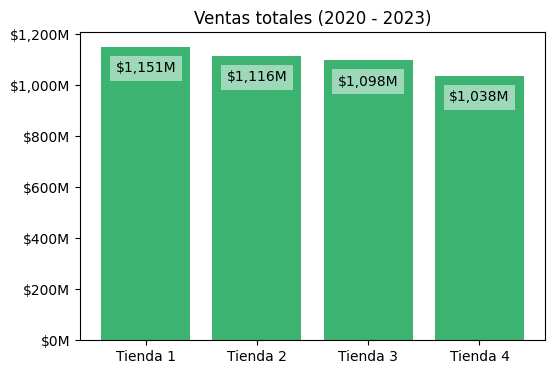

In [459]:
tiendas_df = {'Tienda 1':tienda, 'Tienda 2':tienda2, 'Tienda 3':tienda3, 'Tienda 4':tienda4}

# Calculo de la suma total de ventas en cada dataframe
totales_por_tienda = {}

for nombre, df in tiendas_df.items():
    ventas_totales = df['total_ventas'] = df['Precio'].sum()
    totales_por_tienda[nombre] = ventas_totales

# Definición de las variables a ser graficadas
x = list(totales_por_tienda.keys())
y = list(totales_por_tienda.values())

# Aplicar formato a números
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Realizar gráfica de suma total de ventas por tienda
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x, y, color = 'mediumseagreen')

# Uso de la función millones para formatear números en el eje y
ax.yaxis.set_major_formatter(FuncFormatter(millones))

ax.set_title("Ventas totales (2020 - 2023)")

# Generar etiquetas en las barras
# Uso de la función millones para formatear las etiquetas de las barras
for i, v in enumerate(y):
    ax.text(i, v-100_000_000, millones(v), ha='center', bbox = {'facecolor':'white', 'alpha':0.5, 'edgecolor':'None'})

plt.show()


<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Las 4 tiendas han tenido ventas totales por más de 1000 millones entre 2020 y 2023.</li>
    <li> La tienda 1 ha reportado las mayores ventas totales, por un valor de 1151 millones. </li>
    <li> La tienda 4 ha reportado las menores ventas totales, por un valor de 1038 millones.</li> 
  </ul>
</div>

##### Facturación por año

Para realizar el análisis de facturación por año, sólo se escogieron los años que tenían registro de ventas en sus 12 meses para evitar la generación de sesgos (2020 - 2022).

In [431]:
# Tabla resumen de ventas por año (2020 - 2022) y por tienda

# Combinacíon de dataframes
df_combinados = pd.concat([tienda, tienda2, tienda3, tienda4])

# Filtrado de filas pertenecientes a los años 2020 - 2022
df_combinados_2022 = df_combinados.loc[df_combinados['Ano'].isin([2020, 2021, 2022])]

# Creación de la tabla resumen
tabla_resumen = pd.pivot_table(df_combinados_2022, values = 'Precio', index = 'Ano', columns = 'Tienda', aggfunc = 'sum', fill_value = 0)
tabla_resumen.index = tabla_resumen.index.astype('str')

# Aplicación de formato a la tabla resumen creada
tabla_resumen_formateada = tabla_resumen.map(lambda x: f'${x:,.0f}')
tabla_resumen_formateada

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Ano,,,,
2020,"$368,933,200","$320,466,600","$321,707,500","$330,847,700"
2021,"$362,120,800","$351,215,500","$362,954,400","$347,823,600"
2022,"$316,565,600","$358,226,500","$350,438,300","$302,221,500"


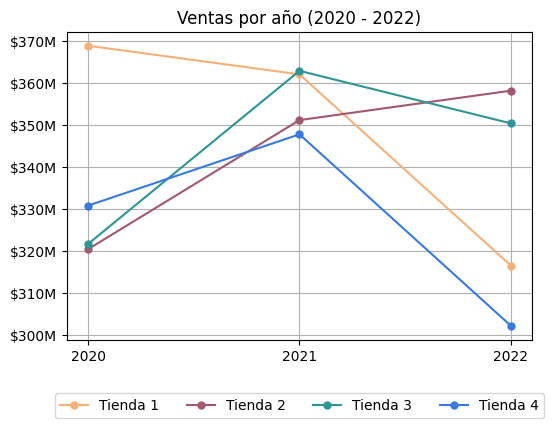

In [432]:
# Gráfica de ventas totales por año

# Creación del gráfico
fig, ax = plt.subplots(figsize = (6,4))

# Formatear con un color y un marcador determinados cada línea graficada:
colores = ['#F6B17A', '#A25772', '#2D9596', '#387ADF']
for color, columna in zip(colores, tabla_resumen.columns):
    ax.plot(tabla_resumen.index, tabla_resumen[columna], label=columna, color=color, linewidth=1.5, marker='o', markersize=5)

ax.set_title('Ventas por año (2020 - 2022)')
ax.yaxis.set_major_formatter(FuncFormatter(millones))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.grid(True)
plt.show()

<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> Hay una caída abrupta en las ventas de la tienda 1 y la tienda 4 en el 2022.</li>
    <li> Se observa una caída ligera en las ventas de la tienda 3 en el 2022 con respecto al 2021.</li>
    <li> La única tienda que ha tenido un crecimiento consistente es la tienda 2.</li>
  </ul>
</div>

##### Facturación por mes

Se realizó el análisis de facturación por mes para detectar temporadas de alta y baja demanda.

In [453]:
# Configuracíon local de idioma (español)
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Creación de tabla resumen de ventas por mes ordenadas por mes y año
df_combinados_mes_ano = df_combinados.copy()
df_combinados_mes_ano['Mes_Ano'] = df_combinados_mes_ano['Mes']+' '+df_combinados_mes_ano['Ano'].astype('str')
tabla_resumen_mes_ano = pd.pivot_table(df_combinados_mes_ano, values='Precio', index='Mes_Ano', columns='Tienda', aggfunc='sum', fill_value=0)
tabla_resumen_mes_ano['Mes_Ano_Orden'] = pd.to_datetime(tabla_resumen_mes_ano.index, format= '%B %Y')
tabla_resumen_mes_ano = tabla_resumen_mes_ano.sort_values(by='Mes_Ano_Orden')
tabla_resumen_mes_ano.head(5)

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Mes_Ano_Orden
Mes_Ano,,,,,
Enero 2020,33084300.0,31129500.0,23782900.0,19298700.0,2020-01-01
Febrero 2020,40054000.0,17388800.0,27577000.0,22880400.0,2020-02-01
Marzo 2020,31562300.0,30515900.0,30024400.0,28533100.0,2020-03-01
Abril 2020,33666100.0,27646600.0,35343500.0,39492700.0,2020-04-01
Mayo 2020,38582900.0,25462300.0,26123800.0,31991400.0,2020-05-01


In [454]:
# Eliminar la columna Mes_Ano_Orden
tabla_resumen_mes_ano = tabla_resumen_mes_ano.drop('Mes_Ano_Orden', axis=1)
tabla_resumen_mes_ano.head(5)

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Mes_Ano,,,,
Enero 2020,33084300.0,31129500.0,23782900.0,19298700.0
Febrero 2020,40054000.0,17388800.0,27577000.0,22880400.0
Marzo 2020,31562300.0,30515900.0,30024400.0,28533100.0
Abril 2020,33666100.0,27646600.0,35343500.0,39492700.0
Mayo 2020,38582900.0,25462300.0,26123800.0,31991400.0


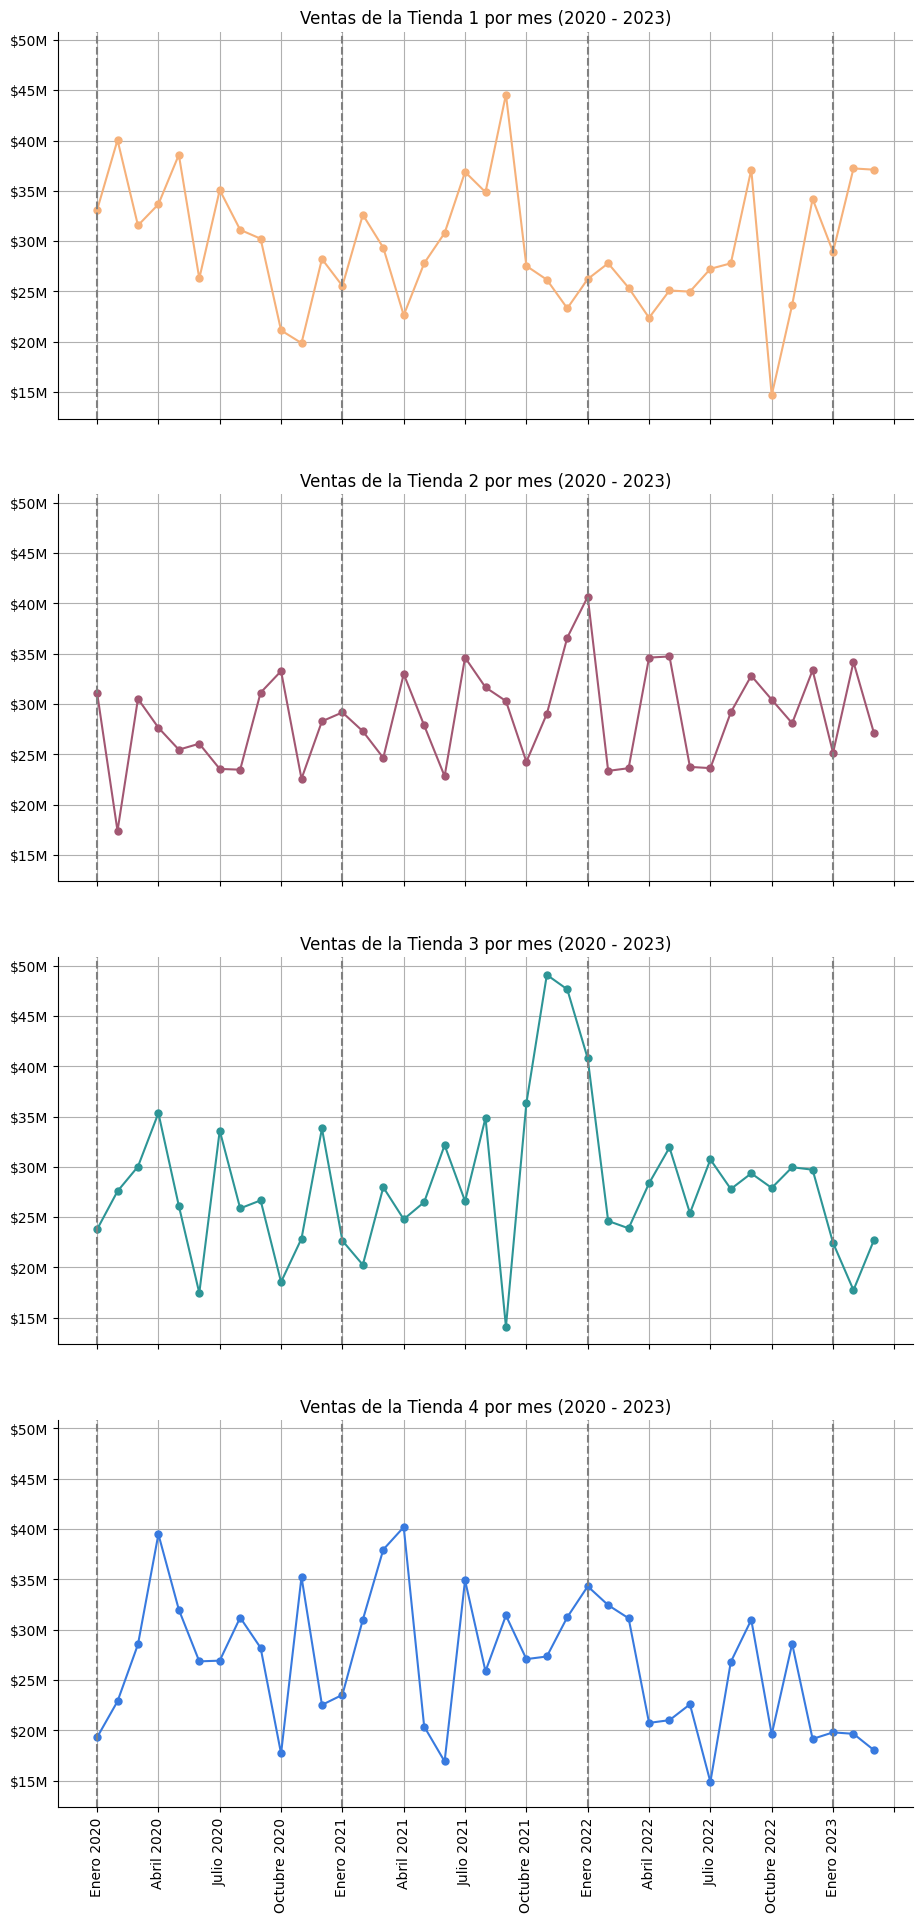

In [452]:
# Grafica de ventas por mes (2020 - 2023) por tienda

fig, ax = plt.subplots(4, 1, figsize=(10,20), sharex=True, sharey=True)

# Graficar líneas de colores predeterminados por cada tienda
colores = ['#F6B17A', '#A25772', '#2D9596', '#387ADF']
for i, color, columna in zip(range(0,4), colores, tabla_resumen_mes_ano.columns):
    ax[i].plot(tabla_resumen_mes_ano.index, tabla_resumen_mes_ano[columna], label=columna, color=color, marker='o', markersize=5)


# Personalización de las gráficas
for i, columna in zip(range(0,4), tabla_resumen_mes_ano.columns):
    # Formateo del título de cada gráfica
    ax[i].set_title(f'Ventas de la {columna} por mes (2020 - 2023)')

    # Formateo de los valores del eje y
    ax[i].yaxis.set_major_formatter(FuncFormatter(millones))

    # Quitar los bordes derecho y superior de las gráficas
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    # Establecer las marcas del eje x cada 3 meses
    ax[i].set_xticks(ticks=range(0, len(tabla_resumen_mes_ano.index)+1, 3))

    # Establecer las líneas guía cada 3 meses
    ax[i].grid(True, which='major')

# Resaltar líneas guía a cada inicio de año
for i in range(0,4):
    for pos in range(0,40,12):
        ax[i].axvline(x=pos, linestyle = '--', linewidth = 1.5, color = 'gray')

# Establecer las etiquetas del eje x con una rotación de 90 grados
ax[3].tick_params(axis='x', labelrotation=90)

plt.tight_layout(pad=3.5)
plt.show()



<div style="background-color: #e7f3fe; color: #084298; padding: 10px; border-left: 8px solid #2D336B; border-radius: 5px;">
  <strong>Observación:</strong>
  <ul>
    <li> La tienda 2 es la tienda que tiene más consistencia en el monto de ventas a lo largo de los años.</li>
    <li> No se identificó en ninguna tienda algún patrón de demanda en relación a las ventas por mes.</li>
  </ul>
</div>

#### Ventas por categoría

In [437]:
# Facturación total por categoría


#### Calificación promedio de la tienda


#### Productos más y menos vendidos

#### Envío promedio por tienda

In [438]:
# Análisis del costo de envío a ciudades y el volumen de ventas. Retorno de inversión.

In [439]:
# Mapa de calor de ventas en ciudades / departamentos

### Recomendaciones